# Predicting the Resale Value of Used Cars

#    Introduction

explain - know your data :
Task - use - method : Develop a model to predict the selling price of used cars based on various features 
such as year, kilometers driven, fuel type, etc.

Goal : This can help sellers set appropriate prices and buyers to understand market trends and value.

## Understand the data

## 1. Import the libaries

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Load the dataset
car_data = pd.read_csv('CAR DETAILS FROM CAR DEKHO (1).csv')

In [3]:
car_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
car_data.shape

(4340, 8)

In [5]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
car_data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [7]:
car_data[car_data.duplicated(keep=False)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


1.Keeping duplicates might bias the model towards overrepresented data points, especially if the number of duplicates is significant compared to the dataset size. 
2.If the same observation is present in both the training and testing sets, this could lead to data leakage and an overestimation of the model's performance.

In [8]:
# Remove duplicates while keeping the first occurrence
car_data = car_data.drop_duplicates(keep='first')

In [9]:
car_data.shape

(3577, 8)

## 2. Data Preprocessing

In [10]:
car_data['age'] = 2020 - car_data['year']
car_data.drop('year',axis=1,inplace = True)

In [11]:
# Assuming 'column_name' is the column you want to encode

mapping_fuel = {'Petrol': 1, 'Diesel': 2, 'CNG': 3, 'LPG': 4, 'Electric':5}
car_data['fuel'] = car_data['fuel'].map(mapping_fuel)

mapping_type = {'Individual': 1, 'Dealer': 2, 'Trustmark Dealer': 3}
car_data['seller_type'] = car_data['seller_type'].map(mapping_type)

mapping_trans = {'Manual': 1, 'Automatic': 2}
car_data['transmission'] = car_data['transmission'].map(mapping_trans)

mapping_owner = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}
car_data['owner'] = car_data['owner'].map(mapping_owner)

In [12]:
#numerical stats
car_data.describe()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
count,3.577000e+03,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000,3577.000000
mean,4.739125e+05,69250.545709,1.543472,1.217501,1.087224,1.516914,7.037462
std,5.093018e+05,47579.940016,0.556005,0.434394,0.282202,0.770910,4.251759
min,2.000000e+04,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000e+05,36000.000000,1.000000,1.000000,1.000000,1.000000,4.000000
50%,3.500000e+05,60000.000000,2.000000,1.000000,1.000000,1.000000,7.000000
75%,6.000000e+05,90000.000000,2.000000,1.000000,1.000000,2.000000,10.000000
max,8.900000e+06,806599.000000,5.000000,3.000000,2.000000,5.000000,28.000000


In [13]:
#check if i have change all the variable to integer.

car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3577 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           3577 non-null   object
 1   selling_price  3577 non-null   int64 
 2   km_driven      3577 non-null   int64 
 3   fuel           3577 non-null   int64 
 4   seller_type    3577 non-null   int64 
 5   transmission   3577 non-null   int64 
 6   owner          3577 non-null   int64 
 7   age            3577 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 251.5+ KB


In [14]:
car_data = car_data.drop(['name'], axis=1)

Drop column 'car_name' because XGBoost cannot handle columns with data type object directly and the car's name is not relevant to the prediction task. 
it might be beneficial to drop it.

In [15]:
# Exclude non-numeric columns and calculate the correlation matrix
numeric_columns = car_data.select_dtypes(include=[np.number]).columns
correlation_matrix = car_data[numeric_columns].corr()

# Display the correlation matrix
print(correlation_matrix)


               selling_price  km_driven      fuel  seller_type  transmission  \
selling_price       1.000000  -0.187359  0.214007     0.189962      0.486269   
km_driven          -0.187359   1.000000  0.280836    -0.144794     -0.101387   
fuel                0.214007   0.280836  1.000000     0.008312      0.007907   
seller_type         0.189962  -0.144794  0.008312     1.000000      0.148595   
transmission        0.486269  -0.101387  0.007907     0.148595      1.000000   
owner              -0.201091   0.264860  0.014431    -0.173824     -0.065911   
age                -0.424260   0.417490 -0.082074    -0.158698     -0.116692   

                  owner       age  
selling_price -0.201091 -0.424260  
km_driven      0.264860  0.417490  
fuel           0.014431 -0.082074  
seller_type   -0.173824 -0.158698  
transmission  -0.065911 -0.116692  
owner          1.000000  0.405142  
age            0.405142  1.000000  


# Explore and visualize

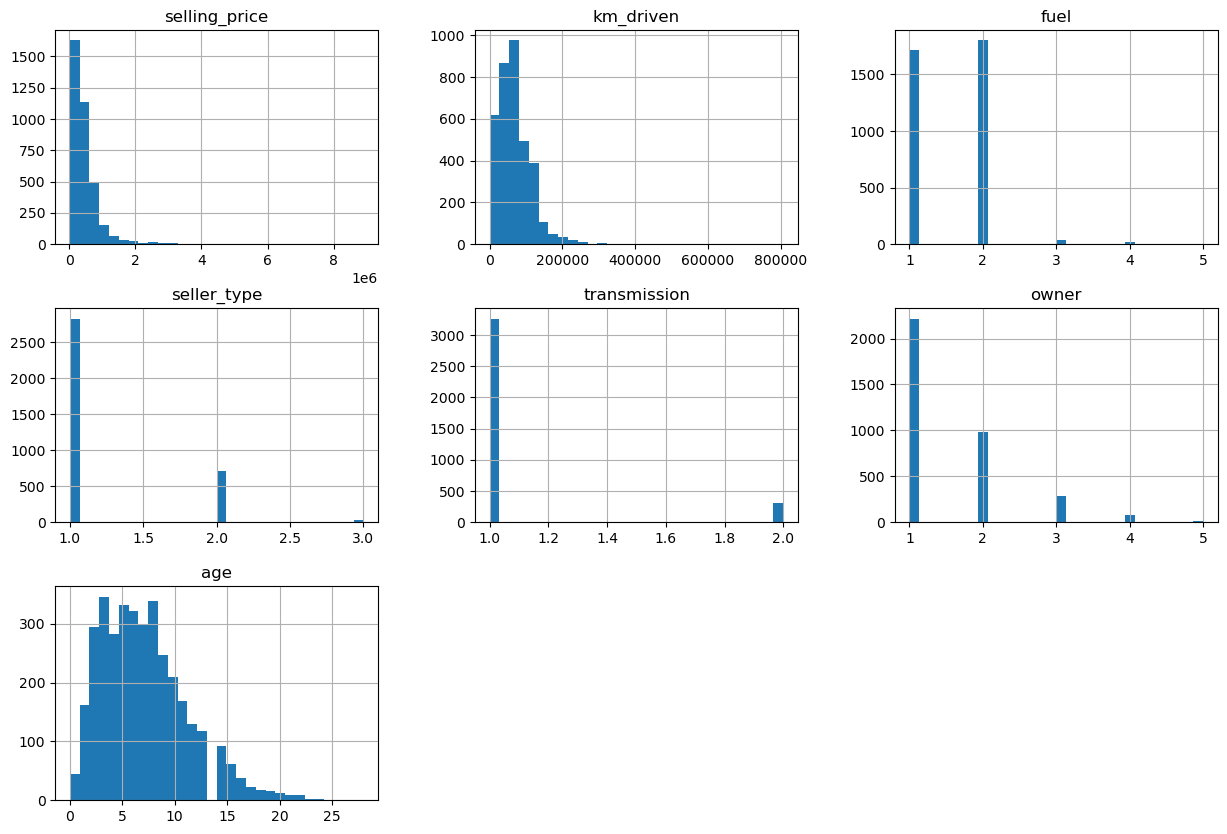

In [16]:
car_data.hist(bins=30, figsize=(15,10))
plt.show()

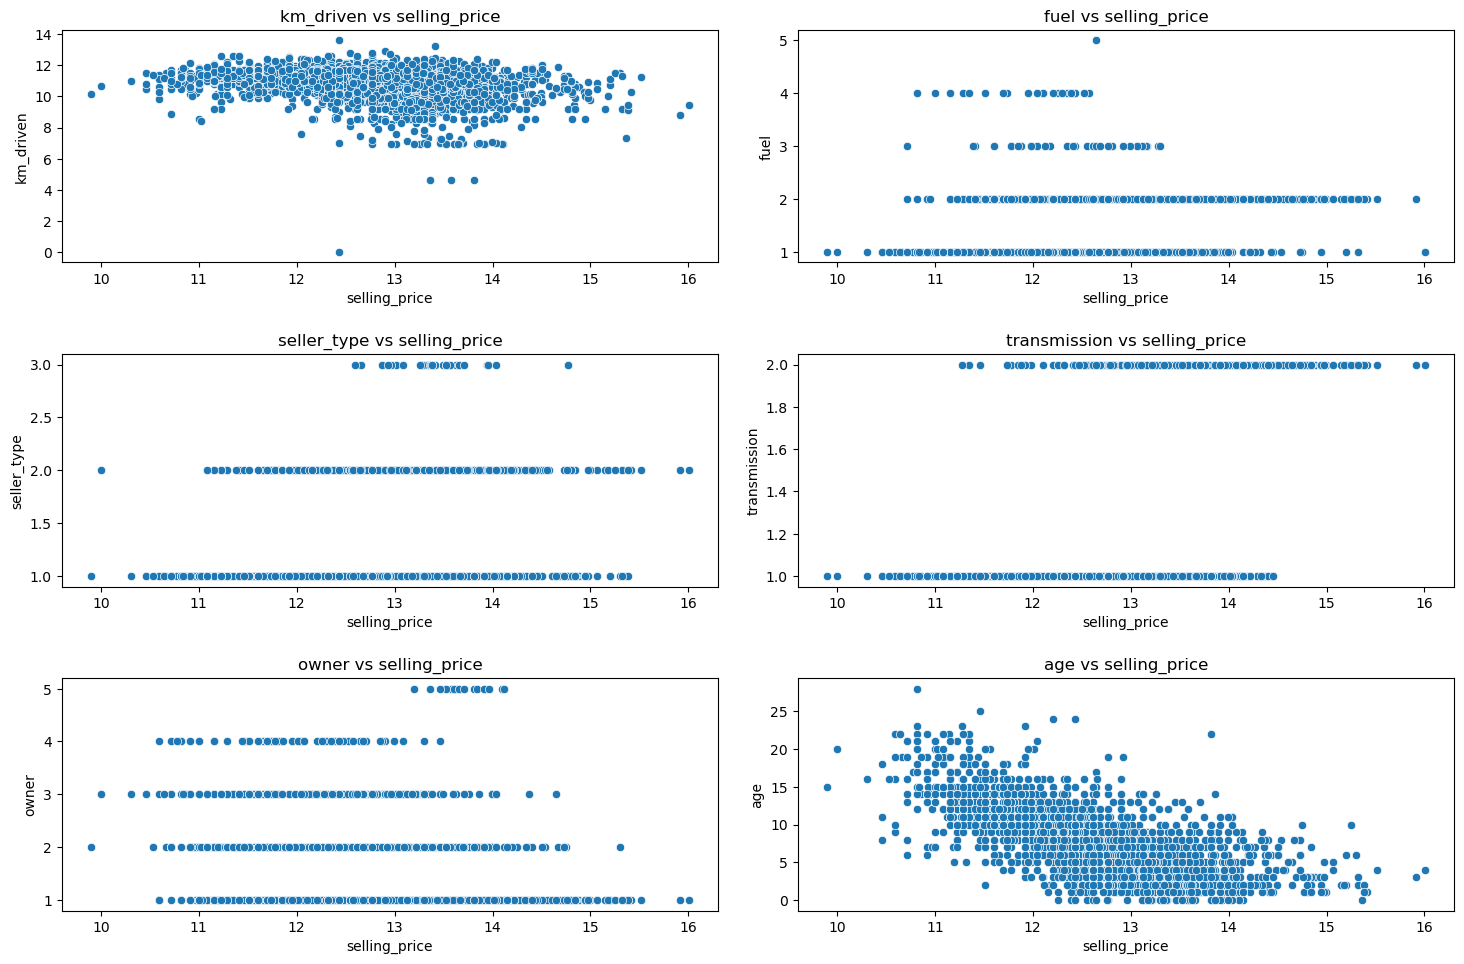

In [41]:
def create_scatterplot(x_axis, column_names, data):
    # 1- set figure size
    plt.figure(figsize=(15, 10))

    # 2- loop over column names list to plot columns
    for index, col in enumerate(column_names):
        # Calculate the number of rows needed for subplots based on the number of columns
        n_rows = (len(column_names) + 1) // 2
        plt.subplot(n_rows, 2, index + 1)  # create sub-plot

        # Create a scatterplot for each column against the x-axis feature
        sns.scatterplot(x=x_axis, y=col, data=data)

        # Set title to each plot
        plt.title(f'{col} vs {x_axis}')

        # Set x and y labels
        plt.xlabel(x_axis)
        plt.ylabel(col)

    # 3- set layout between two plots
    plt.tight_layout(pad=2)

    plt.show()

# Assuming 'Selling_Price' is the feature on the x-axis and you want to compare it with several other features
x_axis = 'selling_price'
column_names = ['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'age']  # Add other relevant features from the dataset

# Call the function with the dataset
create_scatterplot(x_axis, column_names, car_data)



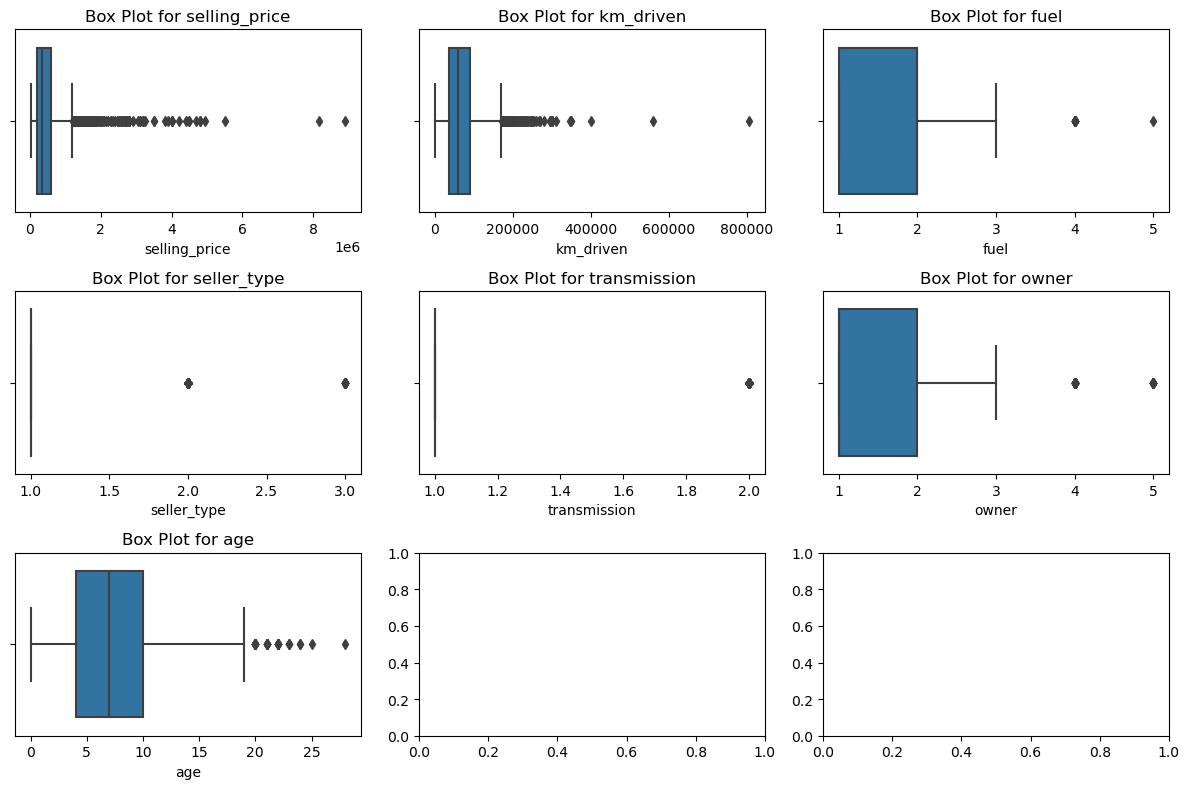

In [17]:
# Assuming df_main is your DataFrame with the specified columns
car_data

# List of numerical columns
num_cols = ['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'age']

# Set up subplots (adjust the grid size based on your needs)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Create box plots for each numerical column
for i, num_col in enumerate(num_cols):
    sns.boxplot(x=num_col, data=car_data, ax=axes[i])
    axes[i].set_title(f'Box Plot for {num_col}')
    axes[i].set_xlabel(num_col)
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
# Assuming 'df' is your DataFrame and 'selling_price' and 'km_driven' are the columns you want to transform
# Make sure to handle zero values since log(0) is undefined

car_data['selling_price'] = car_data['selling_price'].apply(lambda x: np.log(x) if x > 0 else 0)
car_data['km_driven'] = car_data['km_driven'].apply(lambda x: np.log(x) if x > 0 else 0)

# Now, 'selling_price' and 'km_driven' have been transformed logarithmically


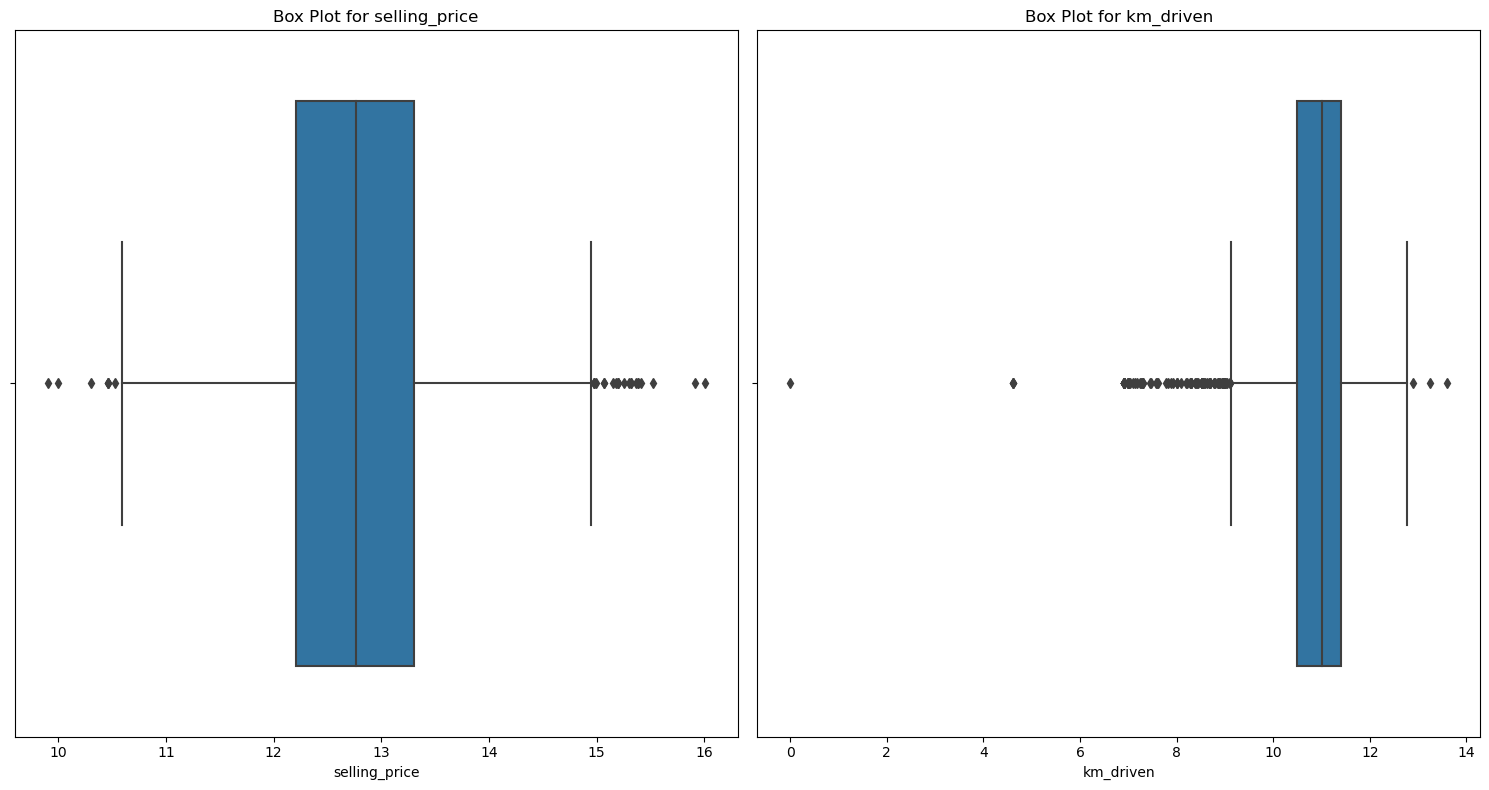

In [19]:
# Assuming df_main is your DataFrame with the specified columns
car_data

# List of numerical columns
num_cols = ['selling_price', 'km_driven']

# Set up subplots (adjust the grid size based on your needs)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Create box plots for each numerical column
for i, num_col in enumerate(num_cols):
    sns.boxplot(x=num_col, data=car_data, ax=axes[i])
    axes[i].set_title(f'Box Plot for {num_col}')
    axes[i].set_xlabel(num_col)
    axes[i].set_ylabel('')

# Adjust layout
plt.tight_layout()
plt.show()

As can be seen from the boxplots above, there are outliers in the dataset. 


#We will identify the outliers based on the Interquartile Range rule (ไม่แน่ใจ)

in this process, I decided not to remove outliers because the changes have not improved their performance as expected.

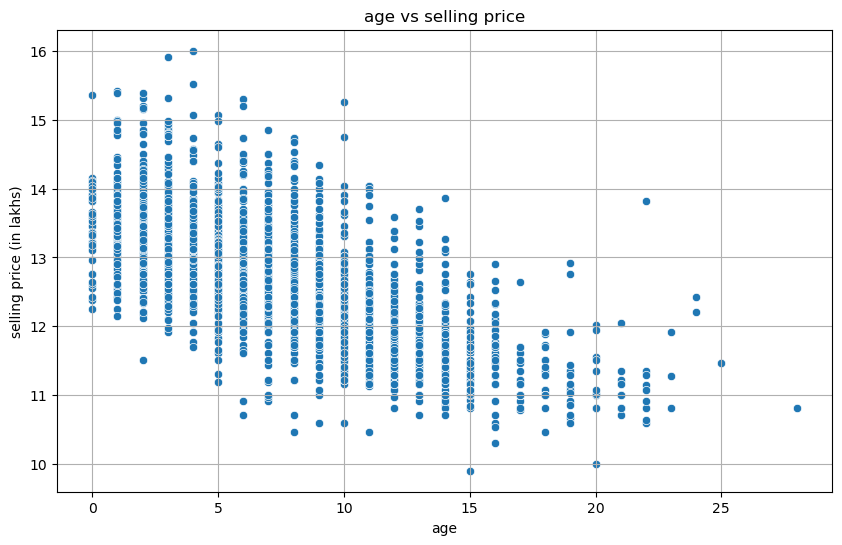

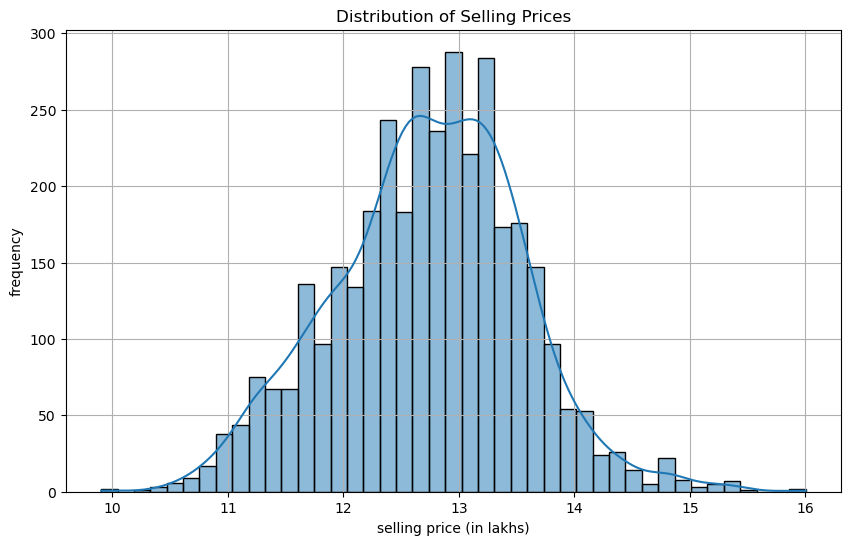

In [20]:
# Visualization of relationships
# Relationship between Year and Selling Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='selling_price', data=car_data)
plt.title('age vs selling price')
plt.xlabel('age')
plt.ylabel('selling price (in lakhs)')
plt.grid(True)
plt.show()


# Histogram of Selling Price
plt.figure(figsize=(10, 6))
sns.histplot(car_data['selling_price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('selling price (in lakhs)')
plt.ylabel('frequency')
plt.grid(True)
plt.show()

# Split the Data

1. Normalize the data
2. Test different models, decision tree, xgboost

In [21]:
car_data.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'age'],
      dtype='object')

In [22]:
car_data

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,11.002100,11.156251,1,1,1,1,13
1,11.813030,10.819778,1,1,1,1,13
2,13.304685,11.512925,2,1,1,1,8
3,12.429216,10.736397,1,1,1,1,3
4,13.017003,11.856515,2,1,1,2,6
...,...,...,...,...,...,...,...
4335,12.923910,11.289782,2,1,1,2,6
4336,12.923910,11.289782,2,1,1,2,6
4337,11.608236,11.326596,1,1,1,2,11
4338,13.670485,11.407565,2,1,1,1,4


In [23]:
from sklearn.preprocessing import MinMaxScaler
normalization = MinMaxScaler()

In [24]:
from sklearn.model_selection import train_test_split

# Select the features from the car_data DataFrame
features = car_data[['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'age']]

# Fit the scaler to the features and transform them
X_normalized = normalization.fit_transform(features)
y = car_data['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (2861, 6) (2861,)
Test set: (716, 6) (716,)


# Build and Train the Model

#        ## Linear Regression module

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the Model

Applying regression models

1. Linear Regression
2. Decision Trees
3. XGBoots
4. Random Forest Regression
5. Support Vector Machines (SVM)
6. K-Nearest Neighbors (KNN)


Lasso Regression
Gradient Boosting regression

In [26]:
# Making predictions and evaluating the model
y_pred = model.predict(X_test)

# Evaluate the model (you can use metrics like Mean Squared Error or R-squared)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.2318941008909527
R-squared: 0.6618244473279498


In [27]:
from sklearn.linear_model import LinearRegression

# Assuming X_train, X_test, y_train, y_test are already defined and contain the split data
model = LinearRegression()
model.fit(X_train, y_train)

# Call the 'score' method on the 'model' object, not on 'linear'
acc = model.score(X_test, y_test)
print(acc)

0.6618244473279498


In [28]:
print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)


Coefficient: 
 [ 0.07997494  1.369813    0.33204299  0.8045038  -0.17704727 -3.34191446]
Intercept: 
 13.234461584594559


from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

feature_importance = model.coef_

# Assuming you have a list of feature names that corresponds to the columns in X_train
feature_names = preprocessor.get_feature_names_out(['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'age'])

print("Feature importances:")
for name, importance in zip(feature_names, feature_importance):
    print(f"{name}: {importance}")

# Module 2 Decision Tree Regression

### Build and Train the Model

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Decision Tree Regressor
# You can tune parameters like 'max_depth', 'min_samples_split', etc.
decision_tree = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
decision_tree.fit(X_train, y_train)

# Make predictions with the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the performance of the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 0.3239542529040185
Root Mean Squared Error: 0.5691697926840623


# Prediction

######Make predictions on the dataset and store in variables called car_pred

In [30]:
car_pred = decision_tree.predict(X_test)
print(car_pred [0:5])
print(y_test [0:5])

[12.98587131 13.44444688 14.40329722 14.49607896 11.5817183 ]
1045    12.506177
3194    13.171154
1530    13.805460
553     15.150512
1612    12.345830
Name: selling_price, dtype: float64


# Train XGBoost

In [31]:
!pip install xgboost

In [32]:
import xgboost as xgb

# Separate the features and the target variable
X = car_data.drop('selling_price', axis=1)
y = car_data['selling_price']

# Initialize the XGBoost regressor
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=100)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the target on the test set
y_pred = xg_reg.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.21753395094806222
R-squared: 0.6827661255540558


# Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor


# Define your features and labels based on the preprocessed data
X = car_data.drop('selling_price', axis=1)  # Replace 'Selling_Price' with the correct column name if different
y = car_data['selling_price']

# Create and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate and print the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R squared: {r2}')


Mean Squared Error: 0.242950801720367
R squared: 0.6457002514154586


# Support Vector Machines (SVM)

In [34]:
from sklearn.svm import SVR

# Define the features and the target variable
# Ensure that the column names match those of your preprocessed dataset
X = car_data.drop('selling_price', axis=1)
y = car_data['selling_price']

# Create the SVM model
model = SVR(kernel='linear')

# Train the SVM model on the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Mean Squared Error: {mse}')
print(f'R squared: {r2}')


Mean Squared Error: 0.23137545201592297
R squared: 0.6625808027905598


# K-Nearest Neighbors (KNN)

In [35]:
from sklearn.neighbors import KNeighborsRegressor

# Assuming 'car_data' is preprocessed and loaded with numerical mappings and normalization applied

# Define the features and target variable
X = car_data.drop('selling_price', axis=1)  # Ensure this is the correct name for the target variable
y = car_data['selling_price']

# Initialize the K-Nearest Neighbors regressor
# The n_neighbors parameter is set to 5 as a default value, you might want to tune this hyperparameter
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the KNN regressor
knn_model.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_model.predict(X_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f'Mean Squared Error: {mse}')
print(f'R squared: {r2}')


Mean Squared Error: 0.2442758309313587
R squared: 0.6437679362594795


# Neural Networks

In [36]:
!pip install --upgrade tensorflow

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


# Define numerical features that will be scaled
numerical_features =['km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'age']  # Update this with actual numerical columns

# Preprocessing: Convert categorical variables to numeric using one-hot encoding and scale numerical variables
preprocessor = ColumnTransformer(
    transformers=[        ('scaler', MinMaxScaler(), numerical_features)
    ],
    remainder='passthrough'  # leave other columns untouched
)

# Define your features and labels
X = car_data.drop('selling_price', axis=1)
y = car_data['selling_price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Get the number of features after preprocessing for input shape
input_shape = [X_train.shape[1]]

# Define the neural network model
def create_model():
    model = Sequential([
        Dense(64, input_shape=input_shape, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Wrap the model using KerasRegressor
neural_network = KerasRegressor(build_fn=create_model, epochs=150, batch_size=10, verbose=1)

# Train the neural network
history = neural_network.fit(X_train, y_train, validation_split=0.1)

# Evaluate the neural network on the test set
mse_test = neural_network.score(X_test, y_test)

# Predict with the neural network (optional)
# y_pred = neural_network.predict(X_test)

print(f'Mean Squared Error on Test Set: {mse_test}')


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers'

## The evaluation matrix:

In conclusion, The model seems to be of moderate quality. An R2 of 0.47 means the model is explaining about 47% of the variance in the in dependent variable that is predictable from the indepent varaibles but suggest there might be more complex underlying patterns in the data that the model is not capturing.